In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Collecing data 
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download

# Reading Data

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Fatures :-
1- work year : Thw year when this salary was paid

2- experience level: The experience of each employee (EN: entry, MI: Mid, SE : senior, EX : excutive)

3- employment type : type of employment for each employee (FT : Full time, pt:part time, Fl, freelancer, Ct:contract)

4- job title : yhe title for each employee

5- salary : salary was paid this year for each job title

6- salary_currency: the currency of the paid salary

7- salary_in_usd : salary in Us dollars

8- employee_residence : The primary country of the employee

9- remote_ratio: The ratio of the work done remotly

10- company_location : The country of the company

11- Company_size : The size of each company(S : small, M: medium, L:large)

# 2- Data information:
## 2.1- number of rows and columns of the data:-

In [3]:
df.shape

(607, 12)

## 2.2 Names of the columns:-

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

## 2.3- describtion of the numerical values:

In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## 2.4- informations about the data:-

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## 2.4- check unique values:-

In [7]:
for col in df.columns:
    print(pd.Series({col : df[col].unique()}))

Unnamed: 0    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
dtype: object
work_year    [2020, 2021, 2022]
dtype: object
experience_level    [MI, SE, EN, EX]
dtype: object
employment_type    [FT, CT, PT, FL]
dtype: object
job_title    [Data Scientist, Machine Learning Scientist, B...
dtype: object
salary    [70000, 260000, 85000, 20000, 150000, 72000, 1...
dtype: object
salary_currency    [EUR, USD, GBP, HUF, INR, JPY, CNY, MXN, CAD, ...
dtype: object
salary_in_usd    [79833, 260000, 109024, 20000, 150000, 72000, ...
dtype: object
employee_residence    [DE, JP, GB, HN, US, HU, NZ, FR, IN, PK, PL, P...
dtype: object
remote_ratio    [0, 50, 100]
dtype: object
company_location    [DE, JP, GB, HN, US, HU, NZ, FR, IN, PK, CN, G...
dtype: object
company_size    [L, S, M]
dtype: object


## 2.6-Data types of the columns:-

In [8]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Converting "Remote_ratio" columns to object column:-

In [9]:
df['remote_ratio'].replace({0: 'On_Site', 50:'Hyprid', 100:'Remotly'}, inplace=True)

### Converting "Remote_ratio" columns to object column:-

In [10]:
df['work_year'] = df['work_year'].astype('object')

# 3- Data cleaning:-

## 3.1 Removing unuseful columns:-

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## 3.2 checking missing values:-

In [12]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 3.3 check duplicates:-

In [13]:
df.duplicated().sum()

42

### 3.3.1 removing duplicates

In [14]:
df.drop_duplicates().head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,On_Site,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,On_Site,JP,S


## 3.4 checking outliers:-

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


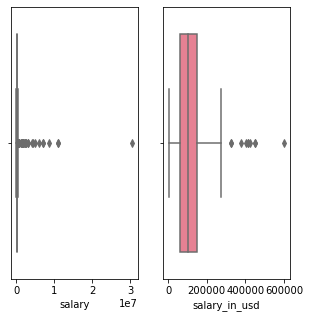

In [15]:
continous = ['salary', 'salary_in_usd']
fig, axes = plt.subplots(1,2 ,figsize = (5,5))
for i,col in enumerate(continous):
    sns.boxplot(df[col], palette='husl',ax = axes[i])

### 3.4.1 Handling outliers:-

In [16]:
for col in continous:
    q1,q3 = np.percentile(df[col], [25,75])
    iqr = q3-q1
    min_val = q1 - (1.5 * iqr)
    max_val = q3 + (1.5 * iqr)
    median = df[col].median()
    df.loc[df[col]>max_val, col] = median
    df.loc[df[col]<min_val, col] = median

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


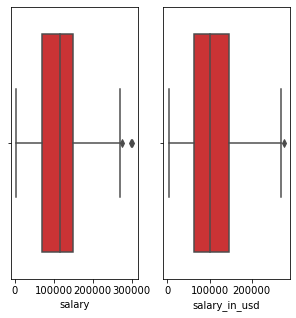

In [17]:
fig, axes = plt.subplots(1,2 ,figsize = (5,5))
for i,col in enumerate(continous):
    sns.boxplot(df[col], palette='Paired_r',ax = axes[i])

In [18]:
cats = []
nums = []

# 4- Univariate analysis

# 4.1- Categorical columns:-

In [19]:
for col in df.select_dtypes('object'):
    cats.append(col)

In [20]:
cats

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

## 4.1.1 - Work year:-

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,2020,2021,2022
work_year,72,217,318


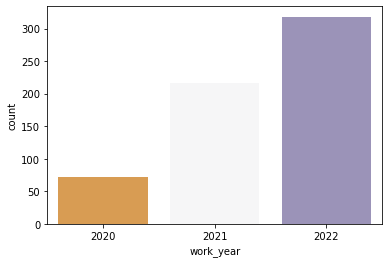

In [21]:
order = df['work_year'].value_counts().sort_values().index
sns.countplot(df['work_year'], order=order, palette='PuOr')
df['work_year'].value_counts().sort_values().to_frame().T

## 4.1.2 - experience_level:-

In [22]:
df['experience_level'].value_counts().to_frame()

,experience_level
SE,280
MI,213
EN,88
EX,26


### The meaning of the values:-
### EN : Entry Level
### MI :  Mid Level
### SE : Senior Level
### EX : Executive Level

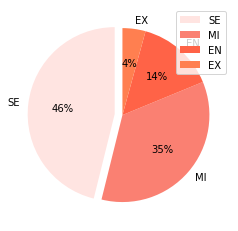

In [23]:
ex = [.09,0,0,0]
order = df['experience_level'].value_counts().index
vals = df['experience_level'].value_counts().values
plt.pie(vals, labels=order, autopct='%0.0f%%',
       startangle=90, explode = ex, colors = ['mistyrose','salmon','tomato', 'coral'])
plt.legend(loc = 'upper right')

## 4.1.3- employment_type:-

In [24]:
df['employment_type'].value_counts().to_frame()

,employment_type
FT,588
PT,10
CT,5
FL,4


### The meaning of the values:-
### PT : Part time
### FT : Full time
### CT : contract
### FL : Freelancer

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,FL,CT,PT,FT
employment_type,4,5,10,588


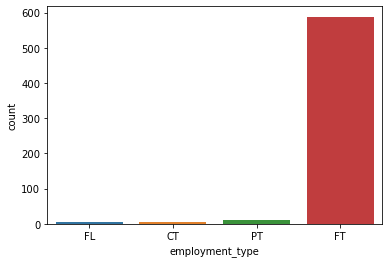

In [25]:
order = df['employment_type'].value_counts().sort_values().index
sns.countplot(df['employment_type'], order=order)
df['employment_type'].value_counts().sort_values().to_frame().T

## 4.1.3- Job Title:-

In [26]:
df['job_title'].nunique()

50

In [27]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Data Scientist,Data Engineer,Data Analyst,Machine Learning Engineer,Research Scientist,Data Science Manager,Data Architect,Big Data Engineer,Machine Learning Scientist,Data Analytics Manager
job_title,143,132,97,41,16,12,11,8,8,7


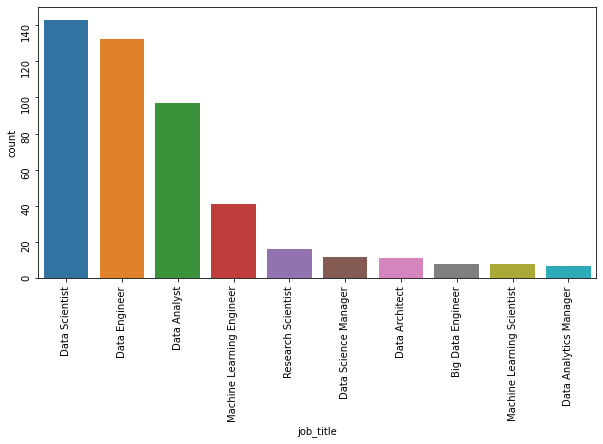

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
order = df['job_title'].value_counts().sort_values(ascending=False).index
vals = order[:10]
sns.countplot(df[df['job_title'].isin(vals)]['job_title'], order=vals)
ax.tick_params(labelrotation = 90)
df['job_title'].value_counts().sort_values(ascending=False).to_frame()[:10].T

## 4.1.4- salary_currency:-

In [29]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [30]:
df['salary_currency'].value_counts().sort_values(ascending=False)

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
SGD      2
AUD      2
BRL      2
CNY      2
DKK      2
HUF      2
MXN      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

## Most used Currencies:-
### USD :US  Dollar
### EUR : Euro
### GBP : Pound sterling
### INR : Indean Rupee
### CAD: Canedian Dollar

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,USD,EUR,GBP,INR,CAD
salary_currency,398,95,44,27,18


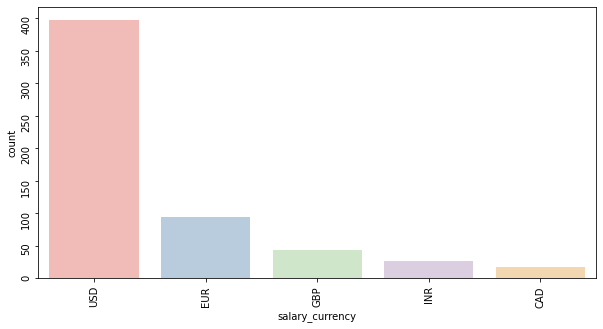

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
order = df['salary_currency'].value_counts().sort_values(ascending=False).index
vals = order[:5]
sns.countplot(df[df['salary_currency'].isin(vals)]['salary_currency'], order=vals, palette='Pastel1')
ax.tick_params(labelrotation = 90)
df['salary_currency'].value_counts().sort_values(ascending=False).to_frame()[:5].T

## 4.1.5 employee_residence (Primary country of the employee):-

In [32]:
df['employee_residence'].nunique()

57

In [33]:
df['employee_residence'].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,US,GB,IN,CA,DE,FR,ES,GR,JP,PT
employee_residence,332,44,30,29,25,18,15,13,7,6


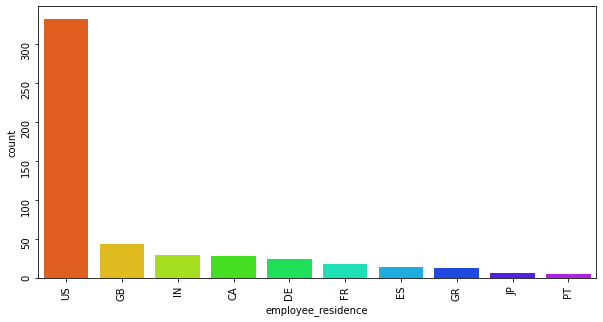

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
order = df['employee_residence'].value_counts().sort_values(ascending=False).index
vals = order[:10]
sns.countplot(df[df['employee_residence'].isin(vals)]['employee_residence'], order=vals, palette='gist_rainbow')
ax.tick_params(labelrotation = 90)
df['employee_residence'].value_counts().sort_values(ascending=False).to_frame()[:10].T

## 4.1.6 Remote ratio

In [35]:
df['remote_ratio'].value_counts()

Remotly    381
On_Site    127
Hyprid      99
Name: remote_ratio, dtype: int64

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Hyprid,On_Site,Remotly
remote_ratio,99,127,381


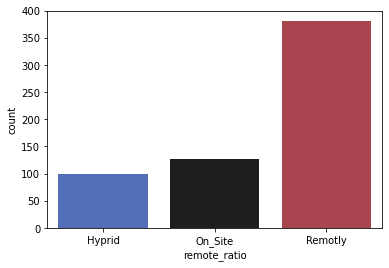

In [36]:
order = df['remote_ratio'].value_counts().sort_values().index
sns.countplot(df['remote_ratio'], order=order, palette='icefire')
df['remote_ratio'].value_counts().sort_values().to_frame().T

## 4.1.7 company_location:-

In [37]:
df['company_location'].nunique()

50

In [38]:
df['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

## Most Common Countries:-
### US : United states
### GB: Great Britani (UK)
### CA: Canada
### DE:  Germany
### IN : India
### FR : France
### ES: Spain
### GR : Greece
### JP : Japan

C:\Users\cs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,US,GB,CA,DE,IN,FR,ES,GR,JP
company_location,355,47,30,28,24,15,14,11,6


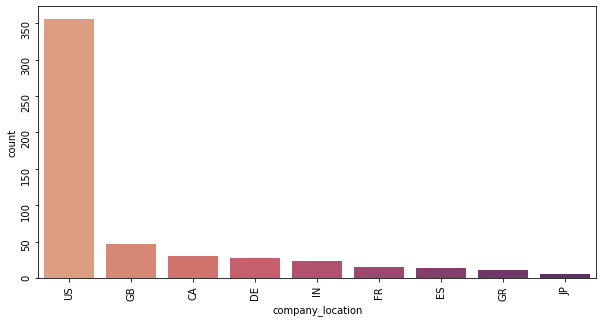

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
order = df['company_location'].value_counts().sort_values(ascending=False).index
vals = order[:9]
sns.countplot(df[df['company_location'].isin(vals)]['company_location'], order=vals, palette='flare')
ax.tick_params(labelrotation = 90)
df['company_location'].value_counts().sort_values(ascending=False).to_frame()[:9].T

## 4.1.8 company_size:-

In [40]:
df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

### The meaning of the values:-
### L : large
### S : Small
### M : Medium

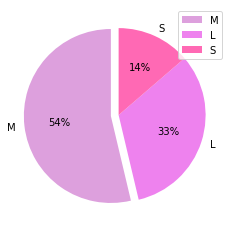

In [41]:
ex = [.09,0,0,]
order = df['company_size'].value_counts().index
vals = df['company_size'].value_counts().values
plt.pie(vals, labels=order, autopct='%0.0f%%',
       startangle=90, explode = ex, colors = ['plum','violet', 'hotpink'])
plt.legend(loc = 'upper right')

# 4.2- Numerical Columns:-

In [42]:
for col in df.select_dtypes(['int64', 'float64']):
    nums.append(col)
nums

['salary', 'salary_in_usd']

## Distribution of the numerical columns:-

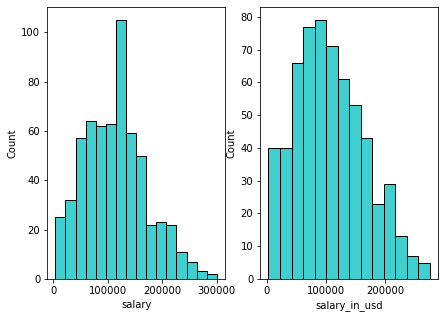

In [43]:
fig, axes = plt.subplots(1,2 ,figsize = (7,5))
axes = axes.flatten().T
for i,col in enumerate(nums):
    sns.histplot(df[col],color = 'c', ax = axes[i])

# saving data into Excael sheet

In [45]:
df.to_excel('ds_salaris_data.xlsx')